In [13]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.signal import spectrogram

In [15]:
# Read in Bad Romance as numpy array, sum left-right channels
fs, data = wav.read('BadRomance.wav')
data_sum = np.sum(data, 1)

In [36]:
# Take one-sided fft of Bad Romance
f, t, Sxx = spectrogram(data_sum, fs=44100, nperseg = 2048, noverlap=1024, return_onesided=True, mode='magnitude')
Sxx = Sxx/2048

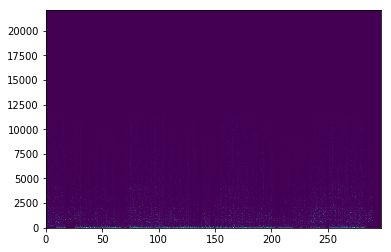

In [35]:
# Plot
plt.figure()
plt.pcolormesh(t,f, Sxx)
plt.show()